**Sprawozdanie z lab13**
*Piotr Piotrak, 82667*

Obliczanie czasu wykonywania obliczeń podaję w milisekundach, ponieważ w przypadku, gdy podawałem czas w sekundach kod stworzony na obliczenia GPU wykonywał się tak szybko, że często wyświetlał czas wykonania = 0.000 s

GPU:

In [73]:
import torch
import time

def monte_carlo_circle_area(n_points,  radius = 1):
  start = time.time()
  x = (torch.rand(n_points, device='cuda') * 2 - 1) * radius
  y = (torch.rand(n_points, device='cuda') * 2 - 1) * radius

  dist = torch.sqrt(x**2 + y**2)
  in_circle = torch.sum(dist < radius)
  pi_estimate = 4 *  (in_circle / n_points)
  end = time.time()
  return pi_estimate, end-start

n_points = 100000000
radius = 10
pi_val, time = monte_carlo_circle_area(n_points, radius)
print("Szacowana wartość pi dla {} punktów i promienia {} to {}".format(n_points, radius, pi_val))
print("Czas wykonania: {:.3f} ms".format(time * 1000))

Szacowana wartość pi dla 100000000 punktów i promienia 10 to 3.1415610313415527
Czas wykonania: 1.336 ms


Powyższy kod jest implementacją metody Monte Carlo do oszacowania wartości liczby pi. Metoda ta polega na losowaniu punktów na płaszczyźnie i liczeniu proporcji punktów leżących wewnątrz okręgu do punktów leżących na zewnątrz. Wartość pi jest następnie oszacowana na podstawie tej proporcji.

Kod rozpoczyna się od zdefiniowania funkcji monte_carlo_circle_area, która przyjmuje dwa argumenty: liczbę punktów (n_points) i promień okręgu (radius). Zmienne start i end służą do zmierzenia czasu wykonania obliczeń.

Następnie tworzone są dwa tensory z losowymi współrzędnymi punktów - x i y. Dla obu z nich, za pomocą metody rand() generowane są losowe liczby i przemnażane przez 2 i 1.

Następnie obliczana jest odległość punktów od środka okręgu za pomocą metody sqrt(x * * 2 + y * * 2). Następnie zliczana jest liczba punktów w okręgu za pomocą metody sum().

Na końcu, obliczane jest pole okręgu za pomocą formuły pi_estimate = 4 * (in_circle / n_points).

Na końcu zmienne pi_val i time przechowują wartość pi oraz czas wykonania obliczeń. Następnie są one wyświetlane.

CPU:

In [74]:
import torch
import time

def monte_carlo_circle_area(n_points,  radius = 1):
  start = time.time()
  # Tworzenie tensorów z losowymi współrzędnymi punktów
  x = (torch.rand(n_points) * 2 - 1) * radius
  y = (torch.rand(n_points) * 2 - 1) * radius

  # Obliczanie odległości punktów od środka okręgu
  dist = torch.sqrt(x**2 + y**2)
  # Zliczanie liczby punktów w okręgu
  in_circle = torch.sum(dist < radius)
  # Obliczanie pola okręgu
  pi_estimate = 4 *  (in_circle / n_points)
  end = time.time()
  return pi_estimate, end-start

n_points = 100000000
radius = 10
pi_val, time = monte_carlo_circle_area(n_points, radius)
print("Szacowana wartość pi dla {} punktów i promienia {} to {}".format(n_points, radius, pi_val))
print("Czas wykonania: {:.3f} ms".format(time * 1000))

Szacowana wartość pi dla 100000000 punktów i promienia 10 to 3.1415138244628906
Czas wykonania: 2342.159 ms


Powyższy kod robi to samo oraz na tej samej zasadzie, co kod na GPU, z tą różnicą że powyższy kod używa do obliczeń CPU zamiast GPU.
Różnica kodów jest w następujących liniach:
1. GPU:
  * x = (torch.rand(n_points, device='cuda') * 2 - 1) * radius
  * y = (torch.rand(n_points, device='cuda') * 2 - 1) * radius

2. CPU:

  * x = (torch.rand(n_points) * 2 - 1) * radius
  * y = (torch.rand(n_points) * 2 - 1) * radius

Reszta kodu jest taka sama, polega na generowaniu losowych współrzędnych punktów, obliczaniu odległości punktów od środka okręgu, zliczaniu liczby punktów w okręgu oraz obliczaniu przybliżonej wartości pi. Na koniec kod wyświetla szacowany wynik oraz czas wykonania obliczeń.
Jedyną różnicą jest użycie GPU/CPU do obliczeń, co przy większej liczbie punktów oraz większym promieniu może mieć znaczący wpływ na czas wykonania obliczeń.

**Wykres**

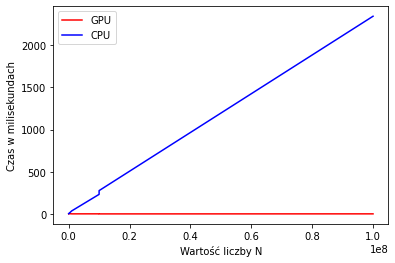

In [75]:
import matplotlib.pyplot as plt

# Dane do wykresu
n = [1000, 10000, 100000, 1000000, 10000000, 10000000, 100000000]
gpu_ms = [0.604, 0.685, 4.384, 1.350, 1.562, 0.825, 1.336]
cpu_ms = [3.613, 1.486, 5.745, 36.160, 232.232, 276.594, 2342.159]

# Rysowanie wykresów
plt.plot(n, gpu_ms, color='red', label='GPU')
plt.plot(n, cpu_ms, color='blue', label='CPU')

# Dodanie opisów osi
plt.xlabel('Wartość liczby N')
plt.ylabel('Czas w milisekundach')

# Dodanie legendy
plt.legend()

# Pokazanie wykresu
plt.show()


**Wnioski:**

* Obliczenia wykonane na GPU są szybsze niż na CPU dla wszystkich wartości liczby N.
* Różnica w czasie obliczeń między GPU a CPU rośnie wraz z rozmiarem problemu (wzrostem liczby N).
* Dla największej wartości N (100000000) różnica w czasie obliczeń między GPU a CPU jest największa - ok. 2000 milisekund.
* Wartości liczby N równe 1000, 10000 i 100000 wykazują najmniejszą różnicę w czasie obliczeń między GPU a CPU, co sugeruje, że dla mniejszych problemów różnica w wydajności między GPU a CPU jest mniejsza.
* Wartości liczby N równe 1000000, 10000000 i 100000000 wykazują znacznie większą różnicę w czasie obliczeń między GPU a CPU, co sugeruje, że dla większych problemów różnica w wydajności między GPU a CPU jest większa, więc przy większych i dokładniejszych obliczeniach lepiej jest używać GPU.
* Czas obliczeń na CPU rośnie liniowo wraz z rozmiarem problemu, podczas gdy czas obliczeń na GPU rośnie dużo wolniej i na wykresie wygląda tak jakby była to pozioma linia, co jeszcze bardziej pokazuje nam o ile szybsze jest robienie obliczeń za pomocą GPU.